In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
df=pd.read_csv("/content/sales_dataset.csv")

/tmp/ipython-input-6-1267798104.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/sales_dataset.csv")


In [ ]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [ ]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

/tmp/ipython-input-8-3256828230.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [ ]:
if 'Amount' in df.columns:
    df['Amount'].fillna(df['Amount'].median(), inplace=True)

/tmp/ipython-input-9-3239702034.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(df['Amount'].median(), inplace=True)


In [ ]:
df.dropna(subset=['Order ID', 'Amount', 'Date'], inplace=True)


/tmp/ipython-input-11-2086817348.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Date')['Amount'].resample('M').sum().plot(title='Monthly Revenue Trend')


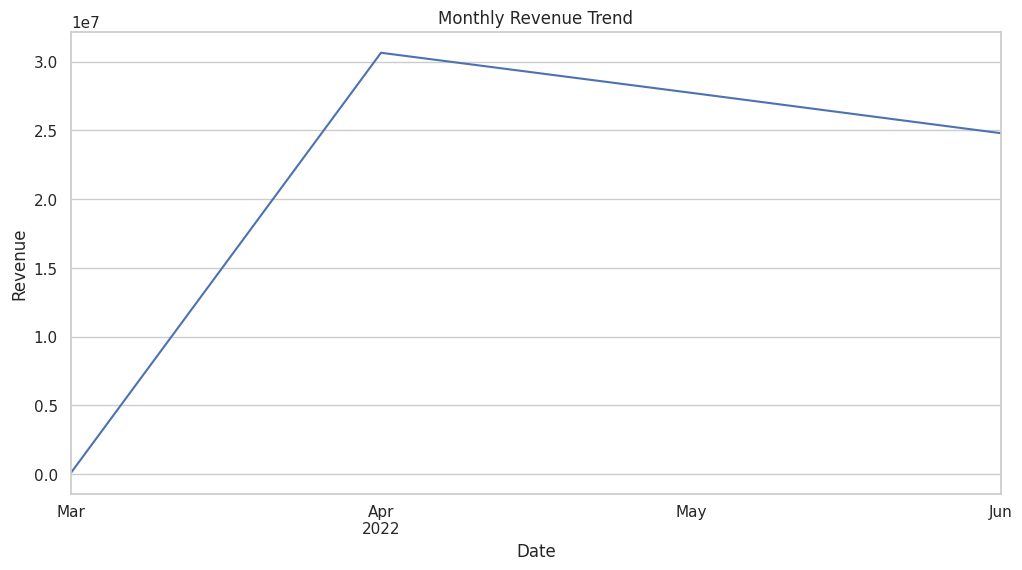

In [ ]:
df.set_index('Date')['Amount'].resample('M').sum().plot(title='Monthly Revenue Trend')
plt.ylabel('Revenue')
plt.show()

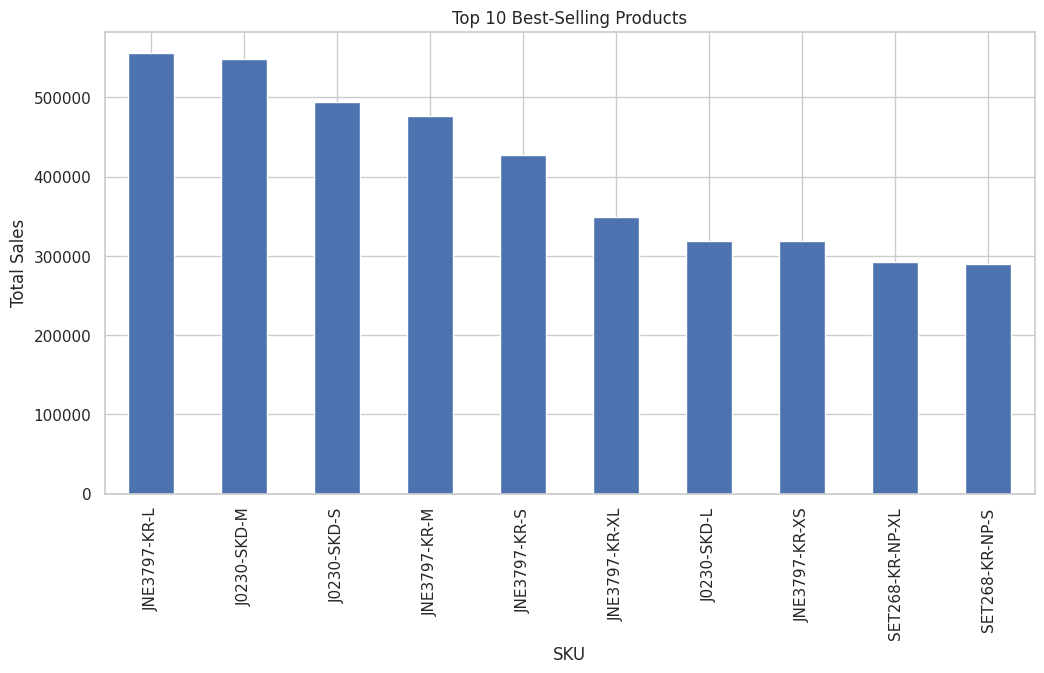

In [ ]:
if 'SKU' in df.columns:
    df.groupby('SKU')['Amount'].sum().sort_values(ascending=False).head(10).plot(kind='bar', title='Top 10 Best-Selling Products')
    plt.ylabel('Total Sales')
    plt.show()

In [ ]:
aov = df.groupby('Order ID')['Amount'].sum().mean()
print("Average Order Value (AOV):", round(aov, 2))

Average Order Value (AOV): 692.06


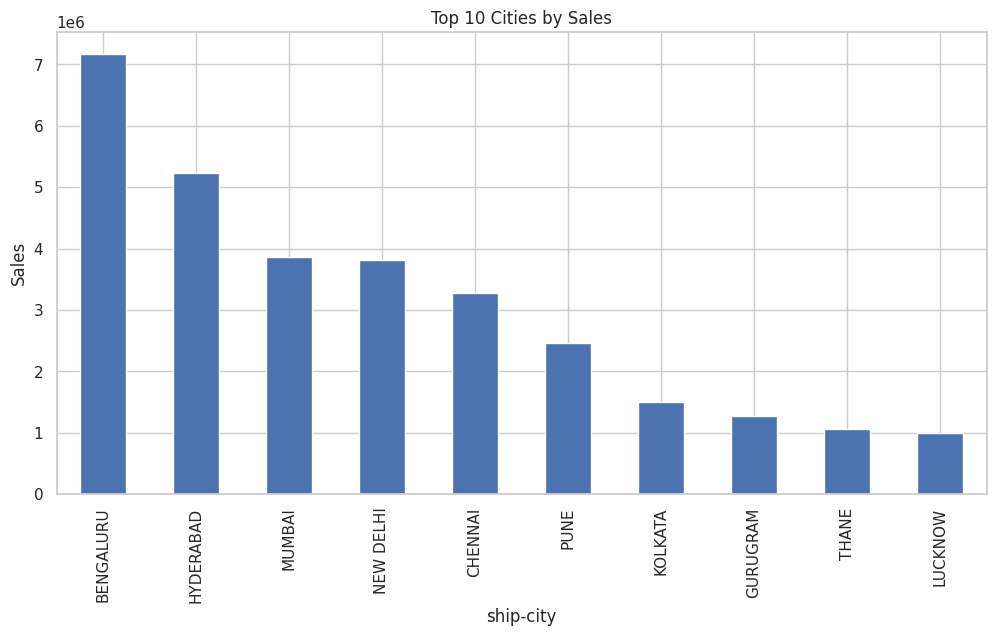

In [ ]:
if 'ship-city' in df.columns:
    df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(10).plot(kind='bar', title='Top 10 Cities by Sales')
    plt.ylabel('Sales')
    plt.show()

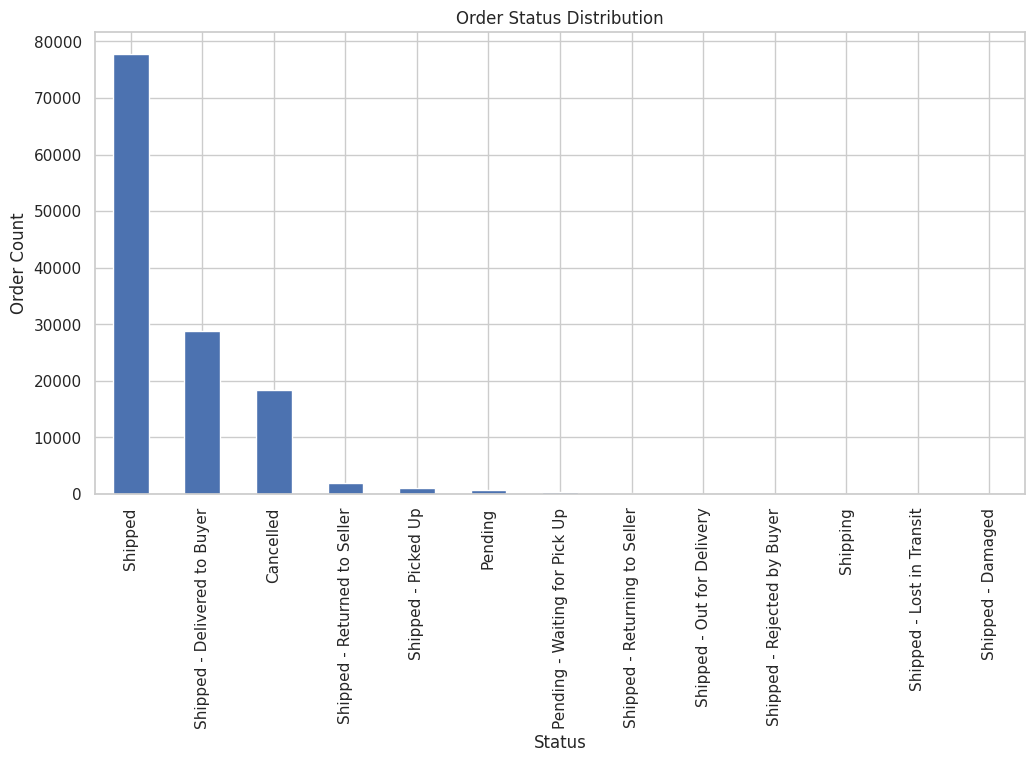

In [ ]:
if 'Status' in df.columns:
    df['Status'].value_counts().plot(kind='bar', title='Order Status Distribution')
    plt.ylabel('Order Count')
    plt.show()

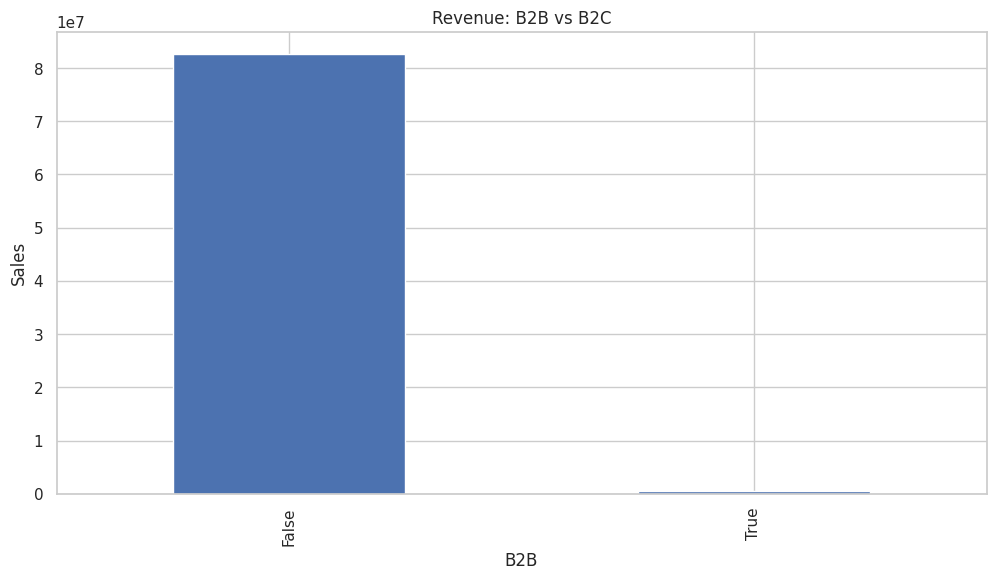

In [ ]:
if 'B2B' in df.columns:
    df.groupby('B2B')['Amount'].sum().plot(kind='bar', title='Revenue: B2B vs B2C')
    plt.ylabel('Sales')
    plt.show()

In [ ]:
if 'fulfilled_by' in df.columns:
    df.groupby('fulfilled_by')['Amount'].sum().plot(kind='bar', title='Sales by Fulfillment Method')
    plt.ylabel('Sales')
    plt.show()

In [ ]:
if 'ship-date' in df.columns and 'delivery-date' in df.columns:
    df['ship-date'] = pd.to_datetime(df['ship-date'], errors='coerce')
    df['delivery-date'] = pd.to_datetime(df['delivery-date'], errors='coerce')
    df['shipping_time'] = (df['delivery-date'] - df['ship-date']).dt.days
    avg_ship_time = df['shipping_time'].mean()
    print("Average Shipping Time (days):", round(avg_ship_time, 2))

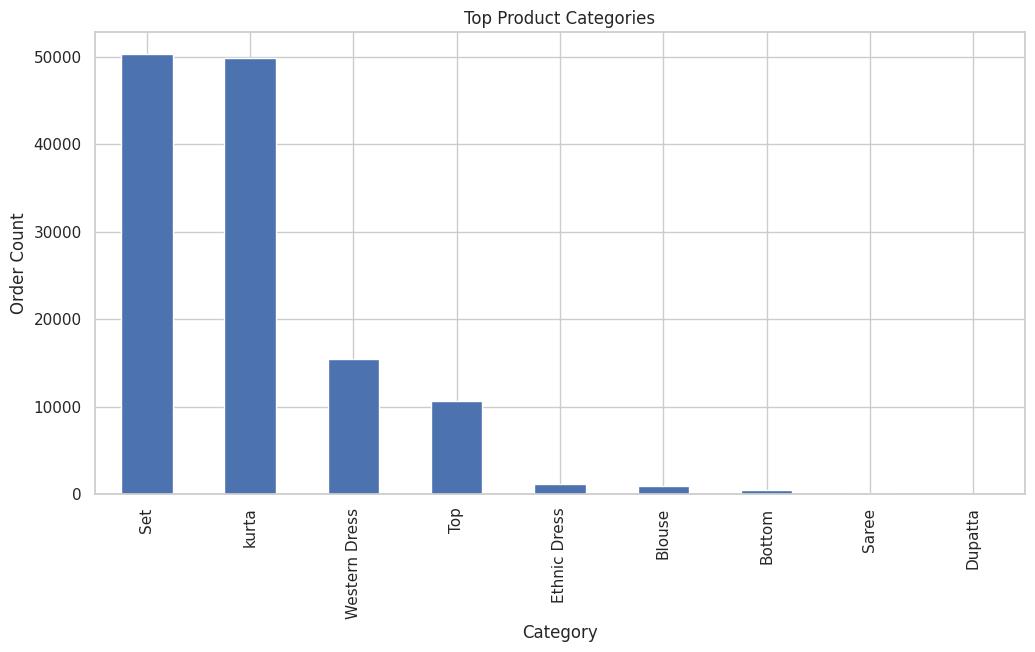

In [ ]:
if 'Category' in df.columns:
    df['Category'].value_counts().head(10).plot(kind='bar', title='Top Product Categories')
    plt.ylabel('Order Count')
    plt.show()

In [ ]:
if 'Quantity' in df.columns:
    avg_quantity = df['Quantity'].mean()
    print("Average Quantity Ordered:", round(avg_quantity, 2))

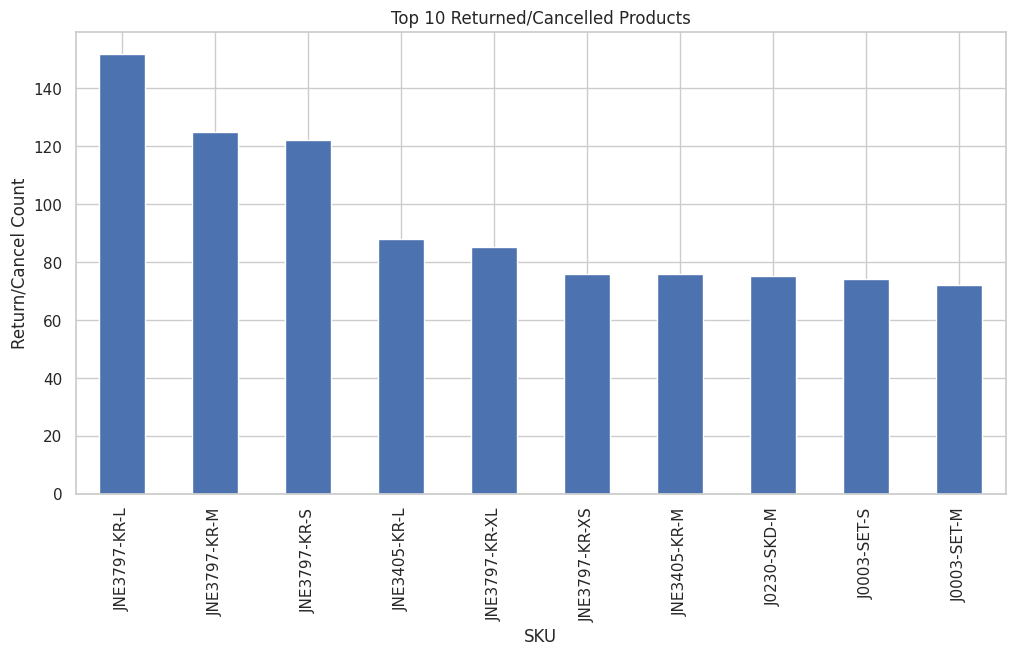

In [ ]:
if 'Status' in df.columns and 'SKU' in df.columns:
    cancelled = df[df['Status'].str.lower().str.contains('cancel|return', na=False)]
    top_cancelled = cancelled['SKU'].value_counts().head(10)
    top_cancelled.plot(kind='bar', title='Top 10 Returned/Cancelled Products')
    plt.ylabel('Return/Cancel Count')
    plt.show()

In [ ]:
print("\n SUMMARY REPORT")
print(f"Total Revenue: ₹{df['Amount'].sum():,.2f}")
print(f"Average Order Value: ₹{round(aov, 2)}")
print(f"Total Orders: {df['Order ID'].nunique()}")
if 'ship-city' in df.columns:
    print(f"Top City by Revenue: {df.groupby('ship-city')['Amount'].sum().idxmax()}")


 SUMMARY REPORT
Total Revenue: ₹83,290,542.94
Average Order Value: ₹692.06
Total Orders: 120352
Top City by Revenue: BENGALURU


In [ ]:
print("\n RECOMMENDATIONS:")
print("- Focus marketing on top-performing cities and product categories.")
print("- Investigate high return/cancelled SKUs to improve product quality.")
print("- Optimize shipping time if data shows long delays.")
print("- Leverage B2B insights to create targeted campaigns.")
print("- Monitor monthly revenue trends for seasonality planning.")


 RECOMMENDATIONS:
- Focus marketing on top-performing cities and product categories.
- Investigate high return/cancelled SKUs to improve product quality.
- Optimize shipping time if data shows long delays.
- Leverage B2B insights to create targeted campaigns.
- Monitor monthly revenue trends for seasonality planning.


In [ ]:
print("\n CONCLUSION:")
print("A data-driven approach has highlighted key areas of growth and improvement. Continued monitoring and iteration will support long-term e-commerce success.")


 CONCLUSION:
A data-driven approach has highlighted key areas of growth and improvement. Continued monitoring and iteration will support long-term e-commerce success.
